# Training a Perceptron for Multi-Class classification (MNIST digit dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [2]:
train_data = pd.read_csv("mnist_train/mnist_train.csv").values

In [3]:
X_train = train_data[:,1:]
y_train = train_data[:,0]
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train))

(60000, 784)
(60000,)
[0 1 2 3 4 5 6 7 8 9]


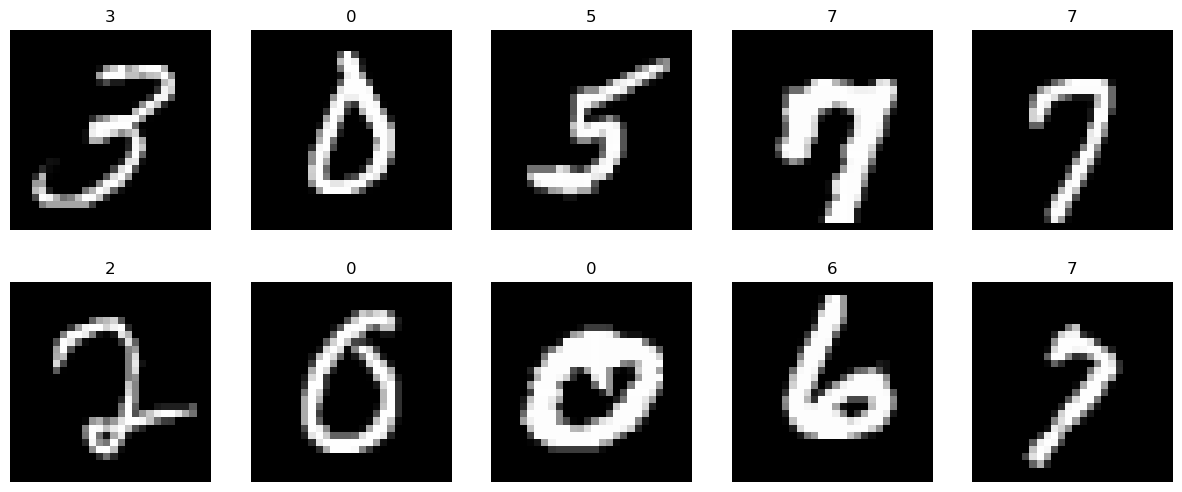

In [4]:
rand_idx = np.random.choice(train_data.shape[0],10)
fig,ax = plt.subplots(2,5,figsize=(15,6))
c = 0
for i in range(2):
    for j in range(5):
        img_arr = X_train[rand_idx[c],:]
        label=y_train[rand_idx[c]]
        img_arr = np.uint8(img_arr.reshape(28,28))
        ax[i,j].imshow(img_arr,cmap="gray")
        ax[i,j].set_title(label)
        ax[i,j].set_axis_off()
        c += 1
plt.show()

In [5]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

clf = Perceptron()
clf.fit(X_train,np.ravel(y_train))
W_ls = clf.coef_
print(W_ls.shape)

(10, 784)


## Without Normalization

In [6]:
test_data = pd.read_csv("mnist_test/mnist_test.csv").values

In [7]:
X_test = test_data[:,1:]
y_test = test_data[:,0]
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test))

(10000, 784)
(10000,)
[0 1 2 3 4 5 6 7 8 9]


In [8]:
clf_no_norm = Perceptron()
clf_no_norm.fit(X_train,np.ravel(y_train))
y_pred_no_norm=clf_no_norm.predict(X_test)


In [9]:
print("Accuracy score of our classifier is :{}".format(accuracy_score(np.ravel(y_test), y_pred_no_norm)))

Accuracy score of our classifier is :0.7816


In [10]:
print("F1 score of our classifier is: {}".format(f1_score(y_test, y_pred_no_norm, average=None)))

F1 score of our classifier is: [0.959      0.75368651 0.85378869 0.81141329 0.84288145 0.55903614
 0.92973523 0.78504673 0.57978227 0.78866698]


In [11]:
print("F1 score of our classifier in weighted avg is: {}".format(f1_score(np.ravel(y_test), y_pred_no_norm, average='weighted')))

F1 score of our classifier in weighted avg is: 0.7880448662225638


### Using Min Max Scaler

In [12]:
MinMaxScaler_scaler = MinMaxScaler()
X_train_MinMaxScaler= MinMaxScaler_scaler.fit_transform(X_train)
X_test_MinMaxScaler= MinMaxScaler_scaler.fit_transform(X_test)

##### SAve nub max scaler to pickle for future use

In [13]:
import pickle
with open('minmaxscaler.pkl', 'wb') as ws:
    pickle.dump(MinMaxScaler_scaler, ws)

In [14]:
clf_MinMaxScaler = Perceptron()
clf_MinMaxScaler.fit(X_train_MinMaxScaler,np.ravel(y_train))
y_pred_MinMaxScaler=clf_no_norm.predict(X_test_MinMaxScaler)


##### Save the model

In [15]:
import pickle
with open('minmaxmodel.pkl', 'wb') as wm:
    pickle.dump(clf_MinMaxScaler, wm)

In [16]:
print("Accuracy score of our classifier is :{}".format(accuracy_score(np.ravel(y_test), y_pred_MinMaxScaler)))


Accuracy score of our classifier is :0.8924


In [17]:
print("F1 score of our classifier is: {}".format(f1_score(np.ravel(y_test), y_pred_MinMaxScaler, average=None)))


F1 score of our classifier is: [0.96236012 0.97049758 0.88997555 0.84310189 0.88626292 0.84038353
 0.93577023 0.90872416 0.81844052 0.85252327]


In [18]:
print("F1 score of our classifier in weighted avg is: {}".format(f1_score(np.ravel(y_test), y_pred_MinMaxScaler, average='weighted')))

F1 score of our classifier in weighted avg is: 0.8922541021701329


### Using Standard Scaler

In [19]:
StandardScaler_scaler = StandardScaler()
X_train_StandardScaler= StandardScaler_scaler.fit_transform(X_train)
X_test_StandardScaler= StandardScaler_scaler.fit_transform(X_test)

In [20]:
clf_StandardScaler = Perceptron()
clf_StandardScaler.fit(X_train_StandardScaler,np.ravel(y_train))
y_pred_StandardScaler=clf_no_norm.predict(X_test_StandardScaler)


In [21]:
print("Accuracy score of our classifier is :{}".format(accuracy_score(np.ravel(y_test), y_pred_StandardScaler)))

Accuracy score of our classifier is :0.8075


In [22]:
print("F1 score of our classifier is: {}".format(f1_score(y_test, y_pred_StandardScaler, average=None)))

F1 score of our classifier is: [0.92150171 0.78203343 0.8172378  0.80171951 0.82884615 0.77491601
 0.9057187  0.85108388 0.46749226 0.80811986]


In [23]:
print("F1 score of our classifier in weighted avg is: {}".format(f1_score(y_test, y_pred_StandardScaler, average='weighted')))

F1 score of our classifier in weighted avg is: 0.7962280879772075


### Reuse the saved models

In [24]:
import pickle
with open('minmaxmodel.pkl', 'rb') as rm:
    model=pickle.load(rm)
print( model)

with open('minmaxscaler.pkl', 'rb') as rs:
    sclr=pickle.load(rs)
print( sclr)

Perceptron()
MinMaxScaler()


In [44]:
import cv2
def input_process(img_file, model, scaler):
    print(img_file)
    img=cv2.imread(img_file)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.destroyAllWindows() #close the image window
    cv2.waitKey(0) #wait for any key
    cv2.imshow('image', img)

    print(img.shape)
    reshape_img=cv2.resize(img,(28,28))
    print(reshape_img.shape)
    print(type(reshape_img))
    
    cv2.destroyAllWindows() #close the image window
    cv2.waitKey(0) #wait for any key
    cv2.imshow('image',reshape_img)
    
    flatten_img = reshape_img.flatten()
    print(flatten_img.shape)
    
    img_sc=scaler.transform(flatten_img.reshape(1,-1))
    print(img_sc.shape)
    pred=model.predict(img_sc)
    print('The image value is : ',pred)
    
input_process('data/test_2.png', model, sclr)

cv2.destroyAllWindows() #close the image window


data/test_2.png
(47, 58)
(28, 28)
<class 'numpy.ndarray'>
(784,)
(1, 784)
The image value is :  [2]


### Visualizing the Weight Matrices

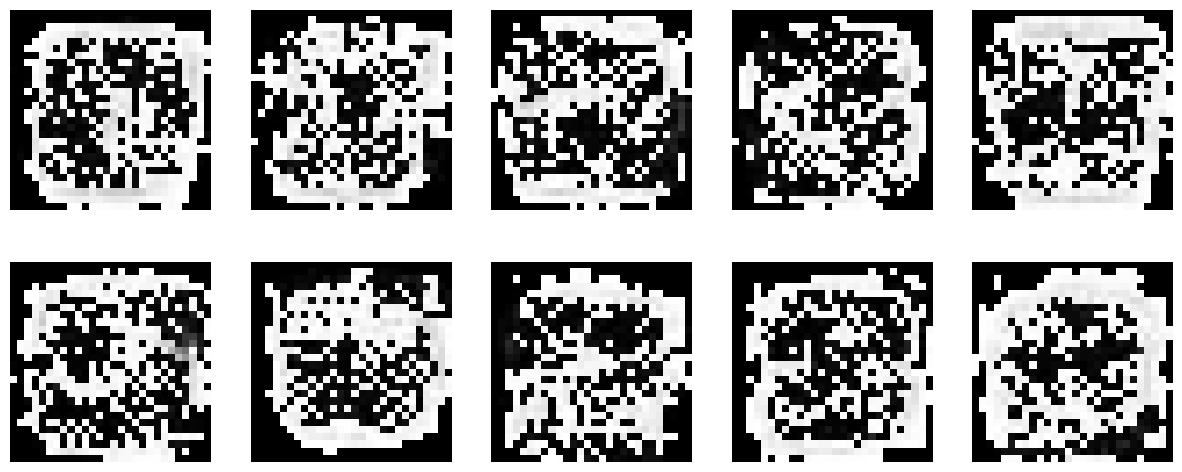

In [26]:
fig,ax = plt.subplots(2,5,figsize=(15,6))
c = 0
for i in range(2):
    for j in range(5):
        wt_img = W_ls[c].reshape(28,28)
        wt_img = np.uint8(wt_img)
        ax[i,j].imshow(wt_img,cmap="gray")
        ax[i,j].set_axis_off()
        c += 1
plt.show()

### Getting the Testing Accuracy

In [27]:
test_data = pd.read_csv("./mnist_test/mnist_test.csv").values
X_test = test_data[:,1:]
y_test = test_data[:,0]
X_test = scaler.transform(X_test)
y_pred = clf.predict(X_test)
print("Accuracy Score of our multi-class classifier is: {}".format(accuracy_score(np.ravel(y_test),y_pred)))
print("F1 Score of our classifier is: {}".format(f1_score(np.ravel(y_test),y_pred,average=None)))

Accuracy Score of our multi-class classifier is: 0.8925
F1 Score of our classifier is: [0.96236012 0.97049758 0.89041096 0.84310189 0.88681102 0.84038353
 0.93577023 0.90872416 0.81844052 0.85252327]
